## Data Analysis for Audio Annotations

This Jupyter Notebook performs a data analysis on the `audio_annotations.csv` dataset. The dataset includes information about audio files, recorders, dates, times, audio durations, start and end times, and species.

### Visualizations Included

1. **Number of Audio Files by Recorder**: A bar chart showing the distribution of audio files among different recorders.

2. **Frequency of Species**: A bar chart displaying the frequency of each species in the dataset.

3. **Distribution of Audio Durations**: A histogram illustrating the distribution of audio durations.

4. **Time of Recordings**: A line chart showing the number of audio files recorded at different times of the day.

5. **Date of Recordings**: A line chart indicating the number of audio files recorded on different dates.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ROOT_PATH = "../"
input_file = ROOT_PATH + "Data/Annotations/" + "audio_annotations.csv"

In [5]:
# Read the CSV file
df = pd.read_csv(input_file)

## Number of Audio Files by Recorder

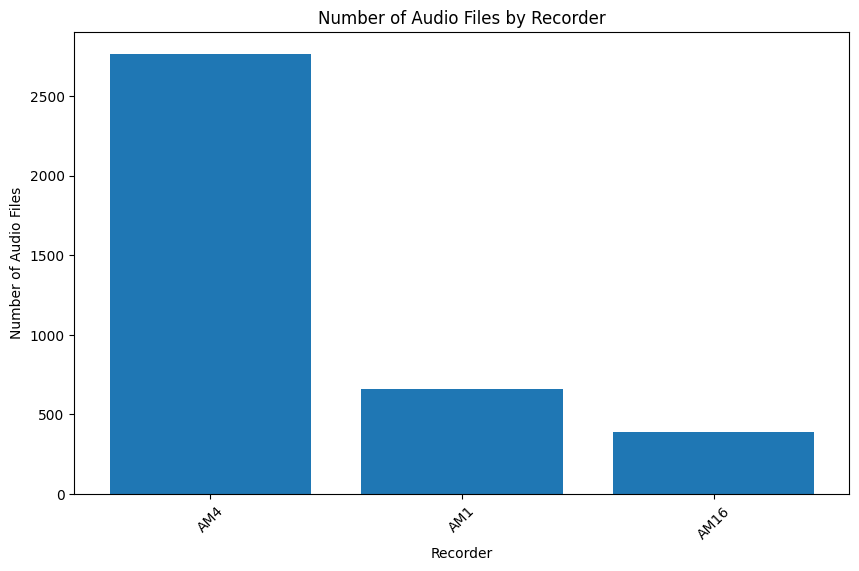

In [6]:
# Count the number of audio files by recorder
recorder_counts = df['recorder'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(recorder_counts.index, recorder_counts.values)
plt.xlabel('Recorder')
plt.ylabel('Number of Audio Files')
plt.title('Number of Audio Files by Recorder')
plt.xticks(rotation=45)
plt.show()

## Frequency of species

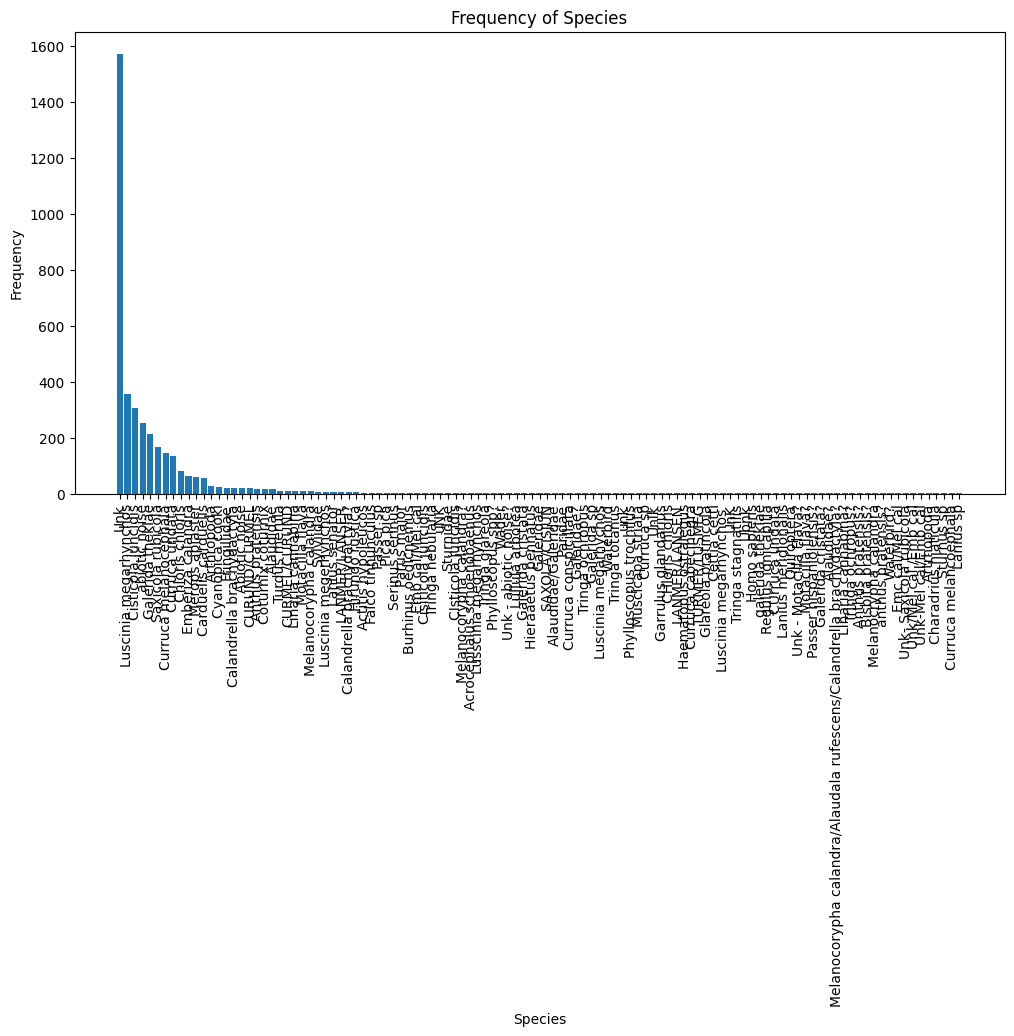

In [7]:
# Count the frequency of each species
species_counts = df['specie'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species')
plt.xticks(rotation=90)
plt.show()

## Distribution of Audio Duration

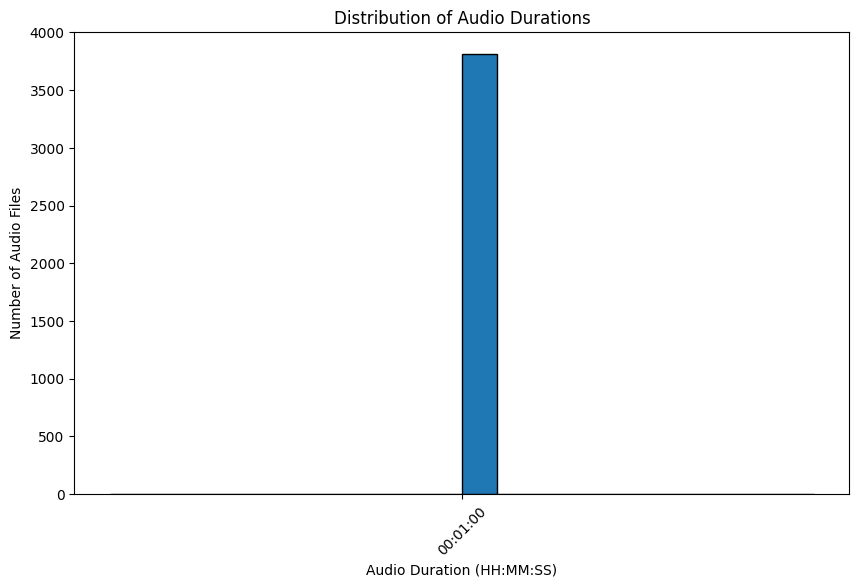

In [8]:
# Plot a histogram of audio durations
plt.figure(figsize=(10, 6))
plt.hist(df['audio_duration'], bins=20, edgecolor='k')
plt.xlabel('Audio Duration (HH:MM:SS)')
plt.ylabel('Number of Audio Files')
plt.title('Distribution of Audio Durations')
plt.xticks(rotation=45)
plt.show()

## Time of recordings

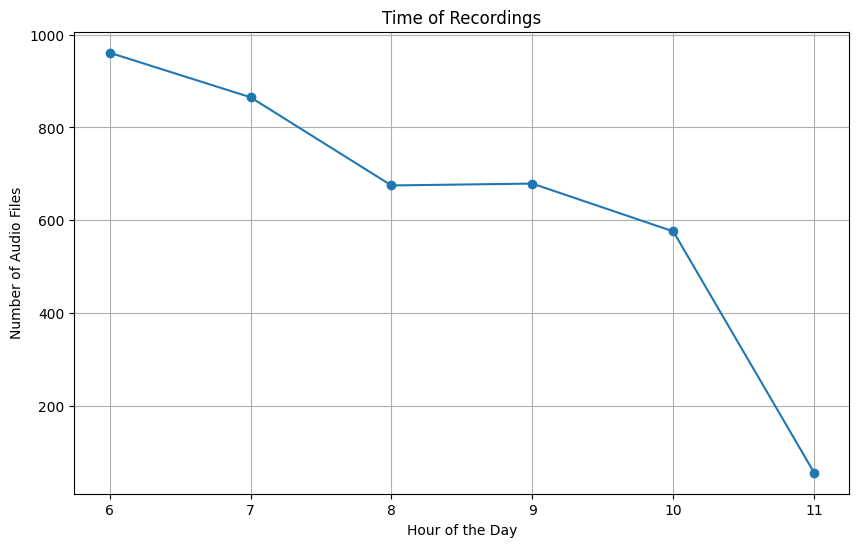

In [9]:
# Convert 'time' to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Extract the hour of the day
df['hour'] = df['time'].dt.hour

# Count the number of audio files recorded at each hour
time_counts = df['hour'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(time_counts.index, time_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Audio Files')
plt.title('Time of Recordings')
plt.grid(True)
plt.show()

## Date of recordings

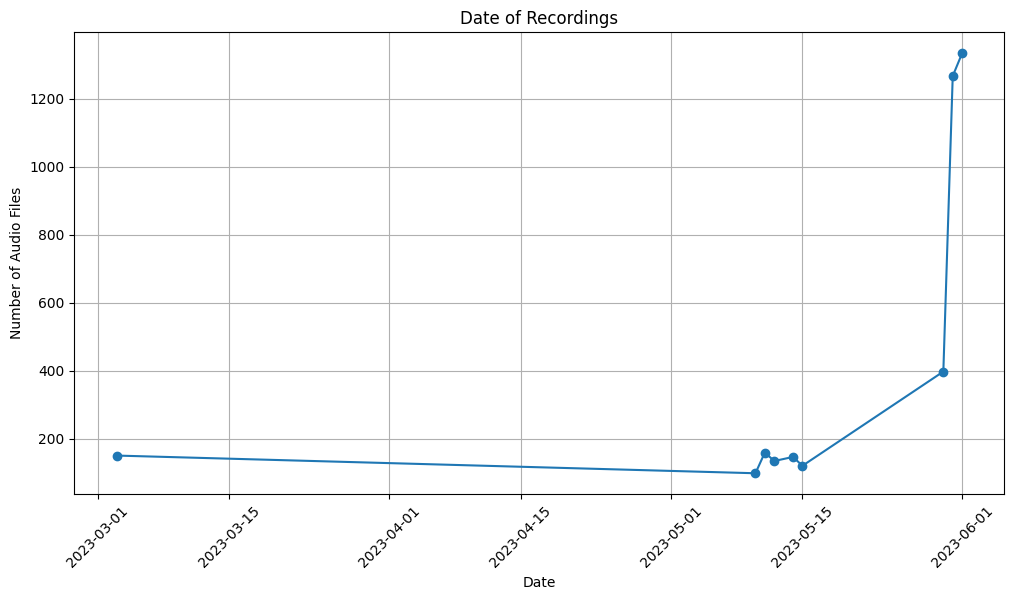

In [10]:
# Convert 'date' to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# Extract the date without time
df['date_only'] = df['date'].dt.date

# Count the number of audio files recorded on each date
date_counts = df['date_only'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Audio Files')
plt.title('Date of Recordings')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
